<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Clustering/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

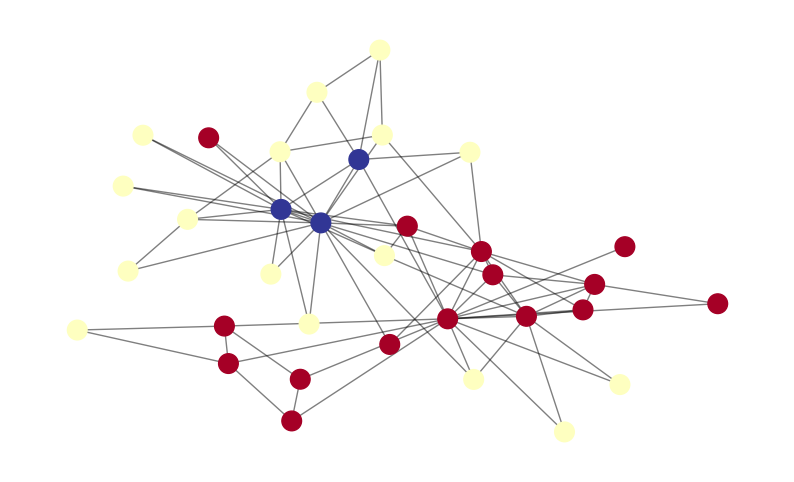

In [12]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Create a social network graph (example)
G = nx.karate_club_graph()

# Perform community detection using the Label Propagation algorithm
communities = community.label_propagation_communities(G)

# Create a mapping of nodes to community membership
node_communities = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_communities[node] = i

# Visualize the social network graph with community colors
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 6))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.RdYlBu, node_color=list(node_communities.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


Community Sizes:

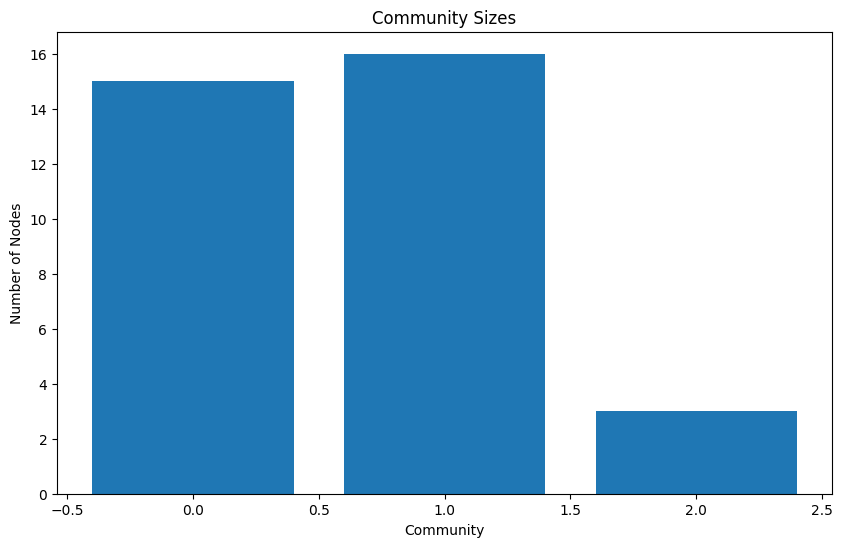

In [13]:
# Count the number of nodes in each community
community_sizes = {i: sum(1 for node in node_communities.values() if node == i) for i in set(node_communities.values())}

# Visualize community sizes
plt.figure(figsize=(10, 6))
plt.bar(community_sizes.keys(), community_sizes.values())
plt.xlabel('Community')
plt.ylabel('Number of Nodes')
plt.title('Community Sizes')
plt.show()


Community Network Visualization: 

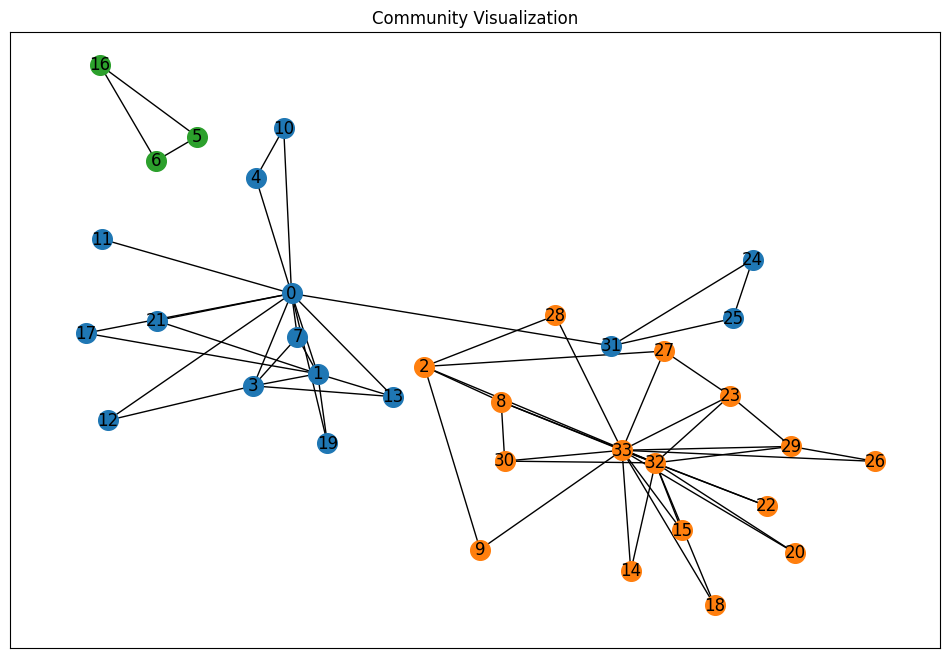

In [14]:
# Create subgraphs for each community
community_subgraphs = []
for i in set(node_communities.values()):
    nodes_in_community = [node for node, comm in node_communities.items() if comm == i]
    community_subgraph = G.subgraph(nodes_in_community)
    community_subgraphs.append(community_subgraph)

# Visualize each community separately
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
for i, subgraph in enumerate(community_subgraphs):
    nx.draw_networkx(subgraph, pos, with_labels=True, node_color=f'C{i}', node_size=200)
plt.title('Community Visualization')
plt.show()


Community Network Metrics:

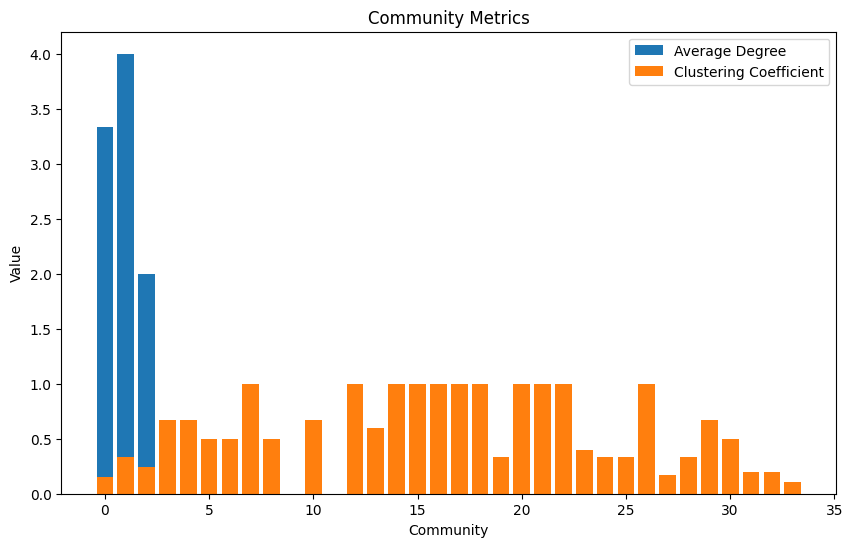

In [15]:
# Compute average degree for each community
average_degrees = {}
for i, subgraph in enumerate(community_subgraphs):
    average_degrees[i] = sum(dict(subgraph.degree()).values()) / subgraph.number_of_nodes()

# Compute clustering coefficient for each community
clustering_coefficients = nx.clustering(G)

# Visualize average degree and clustering coefficient
plt.figure(figsize=(10, 6))
plt.bar(average_degrees.keys(), average_degrees.values(), label='Average Degree')
plt.bar(clustering_coefficients.keys(), clustering_coefficients.values(), label='Clustering Coefficient')
plt.xlabel('Community')
plt.ylabel('Value')
plt.title('Community Metrics')
plt.legend()
plt.show()


Degree Distribution: 

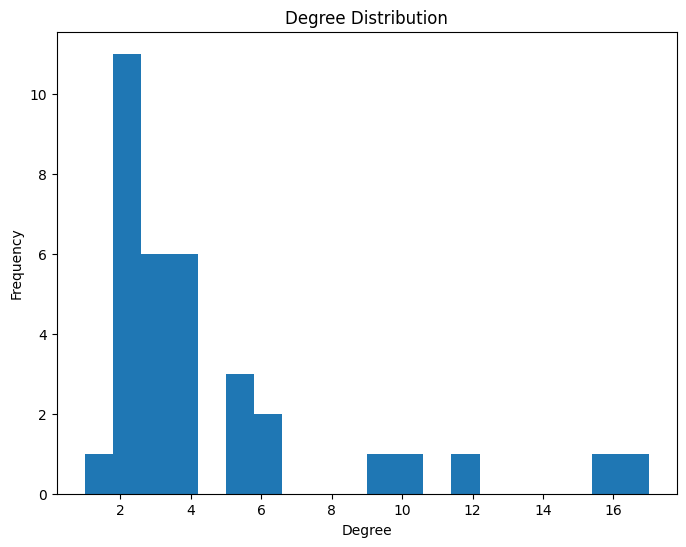

In [16]:
# Compute the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plot the degree distribution
plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()


Centrality Measures: 

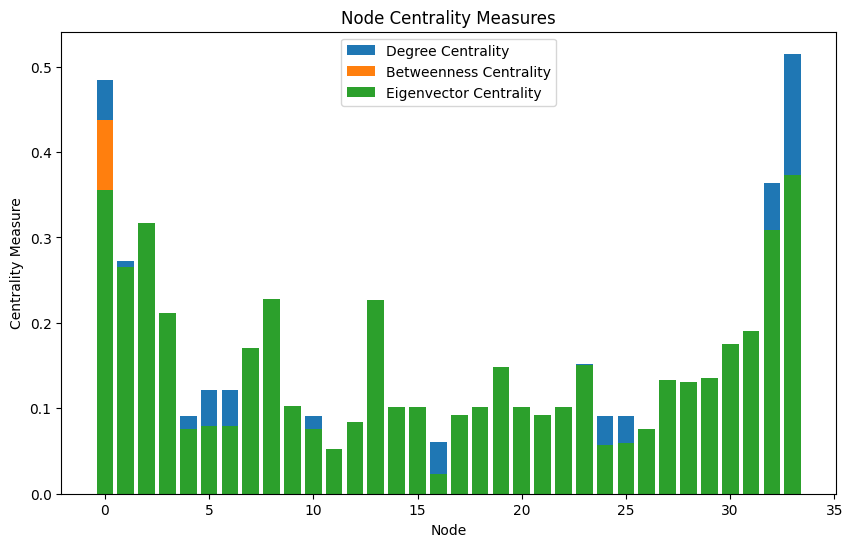

In [17]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Visualize centrality measures
plt.figure(figsize=(10, 6))
plt.bar(degree_centrality.keys(), degree_centrality.values(), label='Degree Centrality')
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), label='Betweenness Centrality')
plt.bar(eigenvector_centrality.keys(), eigenvector_centrality.values(), label='Eigenvector Centrality')
plt.xlabel('Node')
plt.ylabel('Centrality Measure')
plt.title('Node Centrality Measures')
plt.legend()
plt.show()


Assortativity: 

In [18]:
# Compute assortativity coefficient
assortativity = nx.degree_assortativity_coefficient(G)

print(f"Assortativity Coefficient: {assortativity}")


Assortativity Coefficient: -0.47561309768461413
